<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/15_2_pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow에서는 이미 학습된 모델을 손쉽게 불러올 수 있습니다. 

주요 논문 등에 나온 모델을 이미 데이터 학습이 완료된 상태로 불러올 수 있습니다. 

https://www.tensorflow.org/api_docs/python/tf/keras/applications



In [ ]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

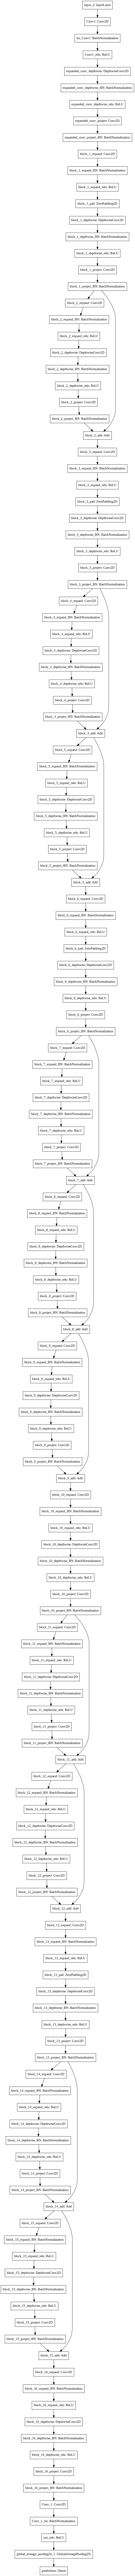

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.weights

[<tf.Variable 'Conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.71659231e-01, -3.33731920e-01,  5.30122258e-02,
           -5.93232973e-21,  2.08742931e-01, -1.20433941e-01,
            1.75700430e-02, -3.10708203e-22, -9.62498877e-03,
            1.90229788e-01, -3.67278278e-01,  3.95997976e-22,
           -2.36236629e-22,  3.36706383e-22,  8.83555040e-02,
           -7.75416642e-02,  3.95842289e-05, -3.63377742e-02,
            5.99925742e-02,  5.53736472e-21, -4.68022423e-04,
           -1.23387486e-01, -1.34351701e-01,  8.75968020e-03,
           -2.47503355e-01,  1.58492010e-02, -2.43145856e-04,
           -1.09811597e-01,  5.55126644e-22, -2.03368161e-03,
            2.83311605e-01,  7.66634047e-02],
          [-3.18941772e-01, -6.09864295e-01, -1.70770675e-01,
           -6.76705635e-21, -5.82342505e-01, -2.56068230e-01,
           -4.18974347e-02,  1.32427304e-22,  2.00757684e-04,
            3.29488933e-01, -4.01886106e-01,  3.63034420e-22,
            1

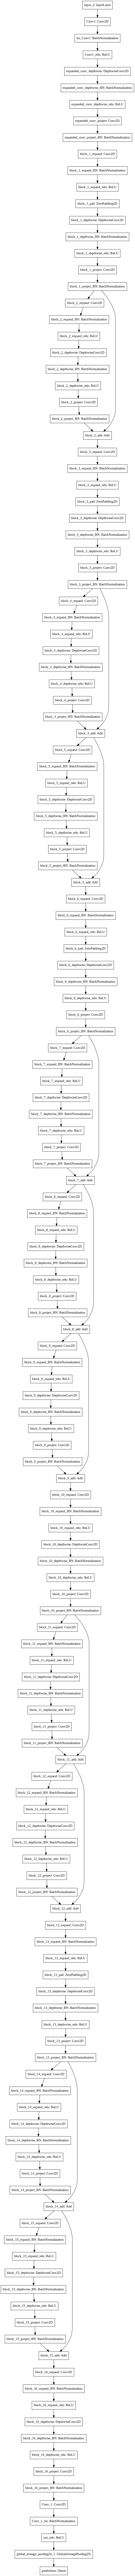

In [ ]:
tf.keras.utils.plot_model(model)

텐서플로 데이터셋은 여러가지 데이터셋을 제공합니다. 

https://www.tensorflow.org/datasets/catalog/overview

https://www.tensorflow.org/datasets/overview

In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imagenet_v2',
    split='test', #split['train', 'test']
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to /root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0.incompleteL324RE/imagenet_v2-test.tfrecord


Dataset imagenet_v2 downloaded and prepared to /root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0. Subsequent calls will reuse this data.


In [ ]:
!ls '/root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0'

dataset_info.json
features.json
imagenet_v2-test.tfrecord-00000-of-00016
imagenet_v2-test.tfrecord-00001-of-00016
imagenet_v2-test.tfrecord-00002-of-00016
imagenet_v2-test.tfrecord-00003-of-00016
imagenet_v2-test.tfrecord-00004-of-00016
imagenet_v2-test.tfrecord-00005-of-00016
imagenet_v2-test.tfrecord-00006-of-00016
imagenet_v2-test.tfrecord-00007-of-00016
imagenet_v2-test.tfrecord-00008-of-00016
imagenet_v2-test.tfrecord-00009-of-00016
imagenet_v2-test.tfrecord-00010-of-00016
imagenet_v2-test.tfrecord-00011-of-00016
imagenet_v2-test.tfrecord-00012-of-00016
imagenet_v2-test.tfrecord-00013-of-00016
imagenet_v2-test.tfrecord-00014-of-00016
imagenet_v2-test.tfrecord-00015-of-00016
label.labels.txt


In [ ]:
dataset

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
info

tfds.core.DatasetInfo(
    name='imagenet_v2',
    version=1.0.0,
    description='ImageNet-v2 is an ImageNet test set (10 per class) collected by closely
following the original labelling protocol. Each image has been labelled by
at least 10 MTurk workers, possibly more, and depending on the strategy used to
select which images to include among the 10 chosen for the given class there are
three different versions of the dataset. Please refer to section four of the
paper for more details on how the different variants were compiled.

The label space is the same as that of ImageNet2012. Each example is
represented as a dictionary with the following keys:

* 'image': The image, a (H, W, 3)-tensor.
* 'label': An integer in the range [0, 1000).
* 'file_name': A unique sting identifying the example within the dataset.',
    homepage='https://github.com/modestyachts/ImageNetV2',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None,

In [ ]:
info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=1000)

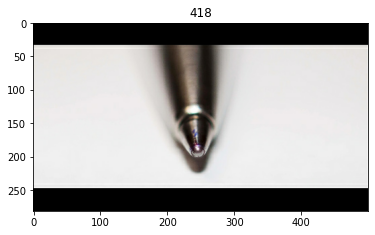

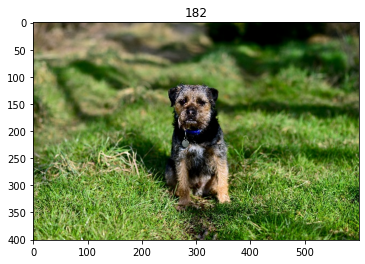

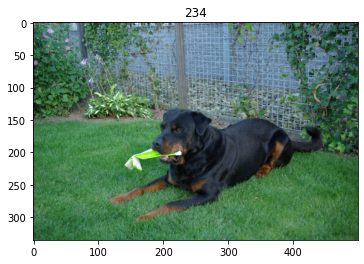

In [ ]:
import matplotlib.pyplot as plt

for image, label in dataset.take(3):
  plt.title(label.numpy())
  plt.imshow(image)
  plt.show()

In [ ]:
info.features['label'].int2str(418)

'n02783161'

https://github.com/modestyachts/ImageNetV2/blob/master/data/metadata/class_info.json


In [ ]:
import pandas as pd
names = pd.read_json('https://raw.githubusercontent.com/modestyachts/ImageNetV2/master/data/metadata/class_info.json')

In [ ]:
names

cid  ...                                              gloss
0      0  ...  freshwater dace-like game fish of Europe and w...
1      1  ...  small golden or orange-red freshwater fishes o...
2      2  ...  large aggressive shark widespread in warm seas...
3      3  ...  large dangerous warm-water shark with striped ...
4      4  ...  medium-sized live-bearing shark with eyes at e...
..   ...  ...                                                ...
995  995  ...  any fungus of the family Geastraceae; in form ...
996  996  ...  large greyish-brown edible fungus forming a ma...
997  997  ...                any fungus of the family Boletaceae
998  998  ...   fruiting spike of a cereal plant especially corn
999  999  ...     a soft thin absorbent paper for use in toilets

[1000 rows x 4 columns]

In [ ]:
names.query('cid==418')

cid  ...                                              gloss
418  418  ...  a pen that has a small metal ball as the point...

[1 rows x 4 columns]

In [ ]:
IMG_SIZE = 224

def resize(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  
  return image, label

In [ ]:
tests = dataset.map(resize)

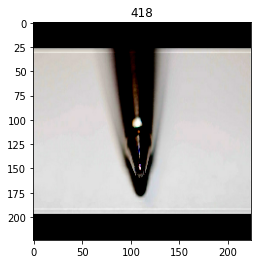

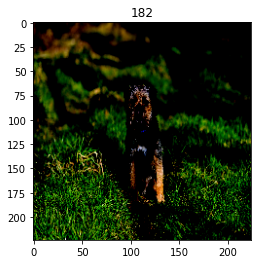

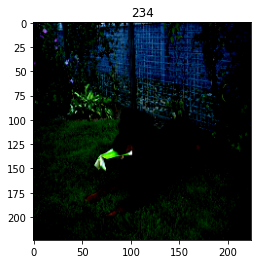

In [ ]:
for image, label in tests.take(3):
  plt.imshow(image)
  plt.title(label.numpy())
  plt.show()
  

In [ ]:
import numpy as np
t = []
for image, label in tests.take(3):    
  t.append(image)
t = np.array(t)
  

In [ ]:
pred_t = model.predict(t)
pred_t.argmax(axis=1)

array([418, 182, 234])

In [ ]:
names.query('cid==418 | cid==182 | cid == 234')

cid  ...                                              gloss
182  182  ...       small rough-coated terrier of British origin
234  234  ...  German breed of large vigorous short-haired ca...
418  418  ...  a pen that has a small metal ball as the point...

[3 rows x 4 columns]

이미지넷 분류 정확도 참고

https://paperswithcode.com/sota/image-classification-on-imagenet